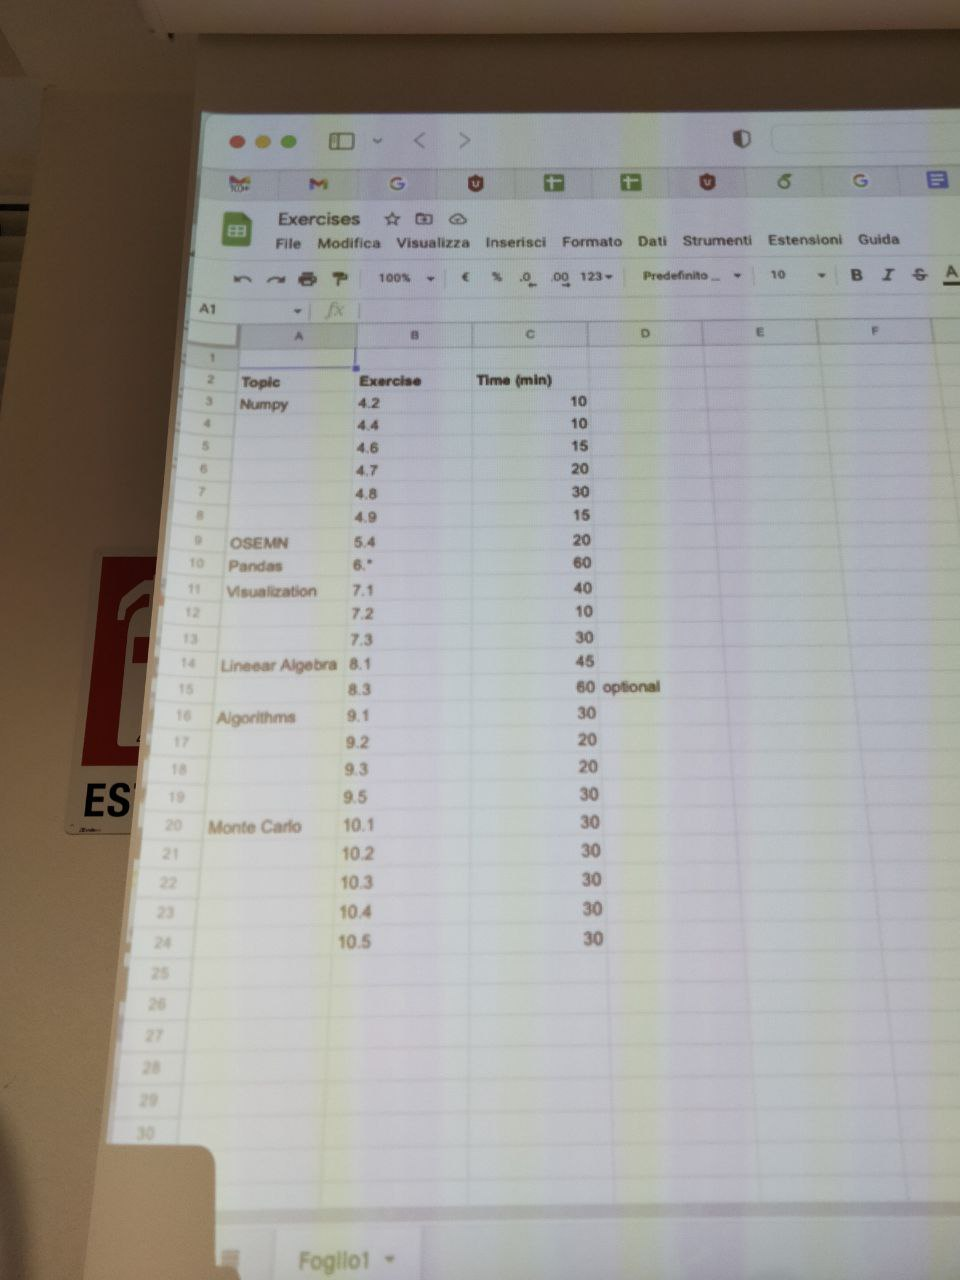

In [1]:
from IPython.display import Image
Image('ex_list_zanetti.jpg',width=500,height=500)

**Topic 4 - Numpy**:

4.2) - 10 minutes

2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [2]:
import numpy as np

u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

In [3]:
# 1) Using numpy.outer():
one = np.outer(u,v)
print(one)

# 2) Using a nested for loop:
two = np.zeros((4,4),int)
for i in range(np.shape(u)[0]):
    for j in range(np.shape(v)[0]):
        two[i,j] = u[i]*v[j]
print(two) 

# 3) Using list comprehension:
three = np.array([[i*j for i in v] for j in u]).reshape(4,4)
print(three)

# 4) Using Numpy broadcasting operations:
z = np.tile(u,(4,1)).T
four = (v*z)
print(four)

# Test:
print(one == two)
print(one == three)
print(one == four)




[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


4.4) - 10 Minutes

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

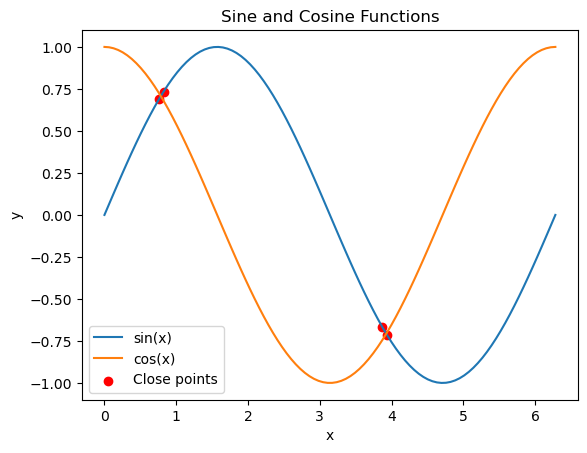

In [4]:
import matplotlib.pyplot as plt

lin = np.linspace(0,2*np.pi,100)

tenth = lin[::10]

reverse = lin[::-1]

diff = lin[np.abs(np.sin(lin)-np.cos(lin)) < 0.1]

# Make a plot showing the sin and cos functions
plt.plot(lin, np.sin(lin), label='sin(x)')
plt.plot(lin, np.cos(lin), label='cos(x)')

# Indicate where sine and cosine are close
plt.scatter(diff, np.sin(diff), color='red', label='Close points')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine and Cosine Functions')
plt.legend()

# Show the plot
plt.show()


4.6) - 15 minutes

6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [5]:
# City names
cities = ["Chicago", "Springfield", "Saint-Louis", "Tulsa", "Oklahoma City", "Amarillo", "Santa Fe", "Albuquerque", "Flagstaff", "Los Angeles"]

# Corresponding positions in miles
positions_miles = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

# Construct a 2D grid of distances using broadcasting
distances_miles = np.abs(positions_miles[:, np.newaxis] - positions_miles)

# Convert distances to kilometers (1 mile = 1.60934 kilometers)
distances_km = distances_miles * 1.60934

# Display the 2D grid of distances in miles
print("Distances (in miles):")
print(distances_miles)

# Display the 2D grid of distances in kilometers
print("\nDistances (in kilometers):")
print(distances_km)


Distances (in miles):
[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]

Distances (in kilometers):
[[   0.       318.64932  487.63002 1184.47424 1401.73514 1890.9745
  2373.7765  2484.82096 3078.66742 3939.66432]
 [ 318.64932    0.       168.9807   865.82492 1083.08582 1572.32518
  2055.12718 2166.17164 2760.0181  3621.015  ]
 [ 487.63002  168.9807     0.       696.84422  914.10512 1403.34448
  1886.14648 1997.19094 2591.0374  3452.0343 ]
 [1184.47424  865.82492  696.84422    0.       217.2609   706.50026
  1189.

4.7) - 20 minutes

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Construct a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [6]:
def primeNumbers(N):
    numbers = np.arange(N)
    
    boolArr = np.array([True]*N)


    for i in range(N):
        if i==0 or i==1 or i==2:
            continue 
        for j in range(i):
            if j==0 or j==1:
                continue
            if i%j==0:
                boolArr[i]=False
                break
            
    return (numbers[boolArr])#masking process
primeNumbers(100)   
    

array([ 0,  1,  2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47,
       53, 59, 61, 67, 71, 73, 79, 83, 89, 97])

In [7]:
# Check performances:

%timeit primeNumbers(100)
%timeit primeNumbers(1000)
%timeit primeNumbers(10000)
    

89.3 µs ± 5.58 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
4.51 ms ± 517 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
354 ms ± 30.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
# With sieve of Eratosthenes:

def erat(N):
    is_prime = [True]*(N+1)
    is_prime[0] = is_prime[1] = False
    
    for num in range(2,int(N**0.5)+1):
        if is_prime[num]:
            for multiple in range(num*2,N + 1,num):
                is_prime[multiple] = False
        
    primes = [num for num in range(N+1) if is_prime[num]]    
    return primes
print(erat(100))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [9]:
%timeit erat(10)
%timeit erat(100)
%timeit erat(1000)

1.46 µs ± 117 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
6.27 µs ± 358 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
71.1 µs ± 3.43 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


4.8) - 20 minutes

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each row")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

In [10]:
import numpy.random as npr
import matplotlib.pyplot as plt

(1000, 200)
[[-1 -1 -1 ... -1  1 -1]
 [-1 -1 -1 ... -1  1 -1]
 [ 1 -1  1 ...  1  1 -1]
 ...
 [-1 -1 -1 ...  1 -1 -1]
 [ 1 -1 -1 ...  1  1 -1]
 [-1 -1 -1 ... -1  1  1]] 

(1000, 200)
[[ -1  -2  -3 ... -26 -25 -26]
 [ -1  -2  -3 ...  -2  -1  -2]
 [  1   0   1 ...  16  17  16]
 ...
 [ -1  -2  -3 ... -22 -23 -24]
 [  1   0  -1 ... -28 -27 -28]
 [ -1  -2  -3 ...   0   1   2]] 

[[  1   4   9 ... 676 625 676]
 [  1   4   9 ...   4   1   4]
 [  1   0   1 ... 256 289 256]
 ...
 [  1   4   9 ... 484 529 576]
 [  1   0   1 ... 784 729 784]
 [  1   4   9 ...   0   1   4]] 

(200,)
[  1.      2.084   3.2     4.156   4.984   5.988   7.12    8.032   9.352
  10.596  11.384  12.252  13.216  14.08   15.272  16.568  17.32   18.412
  19.416  20.496  20.912  22.428  23.568  24.012  25.12   26.1    27.016
  27.608  28.416  29.368  30.52   31.792  32.616  34.496  35.664  36.98
  38.288  39.604  40.816  42.648  44.264  45.216  46.024  46.808  47.728
  48.784  49.24   50.812  51.576  53.212  54.312  55.728  5

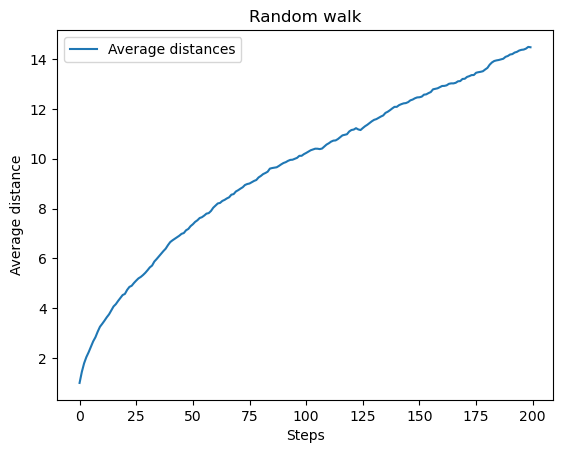

In [11]:
walkers = npr.choice(a=[-1,+1],size=(1000,200)) ## steps 1 and 2
print(np.shape(walkers))
print(walkers,'\n')
dist = np.cumsum(walkers,axis=1) ## step 3
print(np.shape(dist))
print(dist,'\n')
dist2 = np.square(dist)
print(dist2,'\n')
mean = np.mean(dist2,axis=0)
print(np.shape(mean))
print(mean,'\n')
sqr = np.sqrt(mean)

## Plot: 
plt.plot(range(0,200),sqr,label='Average distances')

plt.xlabel('Steps')
plt.ylabel('Average distance')
plt.title('Random walk')

plt.legend()


4.9) 

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [12]:
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

--2024-01-21 10:50:53--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3vigxoqayo389uc/populations.txt [following]
--2024-01-21 10:50:54--  https://www.dropbox.com/s/raw/3vigxoqayo389uc/populations.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaa0c02bcacfe69d0a36b226805.dl.dropboxusercontent.com/cd/0/inline/CLyhK5CCPELe_p4frCvSEryrXHuyFJ6DQP_4PvOMv_O_eQskmgub9y9ekUeiEN6RhwQVbL4KPMxHwcsdBnWcnqQLaMXvUrcNgVkxg7TH5Yhv-X-eYNupnL0OkzuyxHBVz5I/file# [following]
--2024-01-21 10:50:55--  https://ucaa0c02bcacfe69d0a36b226805.dl.dropboxusercontent.com/cd/0/inline/CLyhK5CCPELe_p4frCvSEryrXHuyFJ6DQP_4PvOMv_O_eQskmgub9y9ekUeiEN6RhwQVbL4KPMxHwcsdBnWcnqQLaMXvUrcNgVkxg7TH5Yhv-X-

[[ 1900 30000  4000 48300]
 [ 1901 47200  6100 48200]
 [ 1902 70200  9800 41500]
 [ 1903 77400 35200 38200]
 [ 1904 36300 59400 40600]
 [ 1905 20600 41700 39800]
 [ 1906 18100 19000 38600]
 [ 1907 21400 13000 42300]
 [ 1908 22000  8300 44500]
 [ 1909 25400  9100 42100]
 [ 1910 27100  7400 46000]
 [ 1911 40300  8000 46800]
 [ 1912 57000 12300 43800]
 [ 1913 76600 19500 40900]
 [ 1914 52300 45700 39400]
 [ 1915 19500 51100 39000]
 [ 1916 11200 29700 36700]
 [ 1917  7600 15800 41800]
 [ 1918 14600  9700 43300]
 [ 1919 16200 10100 41300]
 [ 1920 24700  8600 47300]]
[1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920]




Mean: 

Hares: 34080.95238095238 

Lynxs 20166.666666666668 

Carrots: 42400.0 



Standard deviations: 

Hares: 20897.906458089667 

Lynxs 16254.591536908763 

Carrots: 3322.5062255844787 



Correlation coefficient: 

Hares: -0.38917662062641645 

Lynxs -0.02544805962502994 

Carrots: -0.1363332130403686 



P-values: 

Hares: 0.08120591933941336 

Lynxss 0.9128106746672541 

Carrots: 0.5556843861735971 

1900 : Carrots 

1901 : Carrots 

1902 : Hares 

1903 : Hares 

1904 : Lynxss 

1905 : Lynxss 

1906 : Carrots 

1907 : Carrots 

1908 : Carrots 

1909 : Carrots 

1910 : Carrots 

1911 : Carrots 

1912 : Hares 

1913 : Hares 

1914 : Hares 

1915 : Lynxss 

1916 : Carrots 

1917 : Carrots 

1918 : Carrots 

1919 : Carrots 

1920 : Carrots 



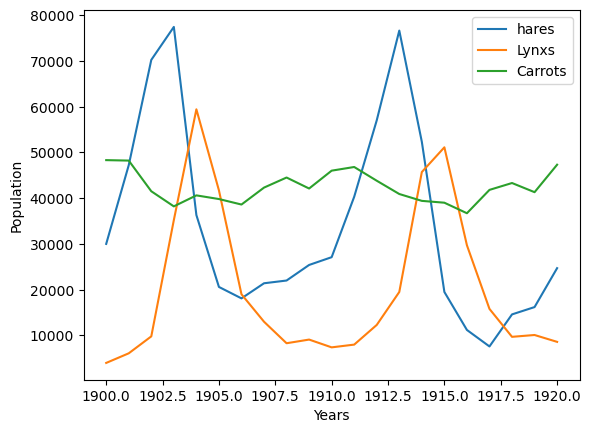

In [13]:
import csv
from io import StringIO
file = 'populations.txt'
data = np.loadtxt(file).astype(int)
print((data))
year = data[:,0]
print(year)
hares = data[:,1]
Lynxs = data[:,2]
Carrots = data[:,3]
plt.plot(year,hares,label='hares')
plt.plot(year,Lynxs,label='Lynxs')
plt.plot(year,Carrots,label='Carrots')
plt.xlabel('Years')
plt.ylabel('Population')
plt.legend()
plt.show

# Satistics:
import scipy.stats as sp

corrh,p_valueh = sp.pearsonr(year,hares)
corrl,p_valuel = sp.pearsonr(year,Lynxs)
corrc,p_valuec = sp.pearsonr(year,Carrots)
print('\n')
print("Mean:",'\n')
print("Hares:",np.mean(hares),'\n')
print("Lynxs",np.mean(Lynxs),'\n')
print("Carrots:",np.mean(Carrots),'\n')
print('\n')
print("Standard deviations:",'\n')
print("Hares:",np.std(hares),'\n')
print("Lynxs",np.std(Lynxs),'\n')
print("Carrots:",np.std(Carrots),'\n')
print('\n')
print("Correlation coefficient:",'\n')
print("Hares:",corrh,'\n')
print("Lynxs",corrl,'\n')
print("Carrots:",corrc,'\n')
print('\n')
print("P-values:",'\n')
print("Hares:",p_valueh,'\n')
print("Lynxss",p_valuel,'\n')
print("Carrots:",p_valuec,'\n')

# Which species has thw highest population each year:
data_noyears = data[:,1:]
for i in range(np.shape(data)[0]):
    j = np.argmax(data_noyears[i],axis=0)
    if j == 0:
        print(data[i,0],": Hares",'\n')
    elif j == 1:
       print(data[i,0],": Lynxss",'\n')
    elif j == 2:
        print(data[i,0],": Carrots",'\n')
    

**Topic 5 - OSEMN**

5.4) 

4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [14]:
import csv
file = 'credit_card.dat'
card = []
with open(file= file) as f:
    for line in f:
        cardnum = ''
        for i in [i*6 for i in range(int((len(line)-4)/6))]: ## 4 bits per line are just for padding
            y = line[i:i+6]
            cardnum += chr(int(y,base=2))
        if cardnum == '': # to remove any cases in which cardnum is empty
            continue
        card.append(cardnum)
f.close()
print(card)

['7648 5673 3775 2271', '3257 8247 3354 2266', '2722 0001 4011 6652', '0661 3063 3742 3150', '0432 1608 1462 4742', '5827 2027 8785 7303', '5774 8528 2087 1117', '8140 1210 6352 2845', '5764 1133 7301 7100', '6456 1737 4126 6726', '1228 8631 7382 0000', '7051 0160 5374 3166', '0618 3587 1630 6376', '1545 5454 7444 5636', '6735 3116 3202 6834', '7287 5011 1547 8413', '7033 2607 3328 4200', '2568 5244 1874 5024', '1684 2253 7570 7118', '0672 2576 0575 6631', '6332 8353 8787 1340', '1813 3361 1175 4211', '2477 6450 8840 2368', '5512 3505 2563 1326', '3083 7882 0621 0025', '4521 5148 8045 0334', '7563 3654 8713 5787', '8324 2664 0476 5561', '0565 2504 7168 3510', '5107 5507 1767 0738', '2462 1821 2448 1443', '2788 0638 6861 6554', '5851 5873 5474 0547', '0670 1004 4013 2655', '5874 5506 3048 0806', '2805 5401 8462 1260', '5083 8406 6310 1862', '1076 1445 3013 2266', '8440 4804 4844 5277', '4758 6141 0686 1387', '7586 0675 0315 2568', '2544 1258 7432 5165', '3474 5023 4434 5626', '1410 0270

**Topic 6 - Pandas**

## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [15]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2024-01-21 10:50:57--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2024-01-21 10:50:58--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf720adf6bc736cab891237c43e.dl.dropboxusercontent.com/cd/0/inline/CLzGg2SW6NC9YhXvFa3kWeleTptDU1ZSmDo4RekdH4r3K35rnpDDtgVFxARa4MCYjm_hrx5RzZUqY6UdJEtEC9eFqqdhuExM0py7l2r31v-2PuiixI0B8t_g7GNbf-Zat1o/file# [following]
--2024-01-21 10:50:58--  https://ucf720adf6bc736cab891237c43e.dl.dropboxusercontent.com/cd/0/inline/CLzGg2SW6NC9YhXvFa3kWeleTptDU1ZSmDo4RekdH4r3K35rnpDDtgVFxARa4MCYjm_hrx5RzZUqY6UdJEtEC9eFqqdhuExM0py7l2r31v-2Pui

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [16]:
# 1:
import numpy as np
import pandas as pd

file = 'data_000637.txt'
N = 15000
df = pd.read_csv(file[:N])
df.head()
# df.describe()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25


In [17]:
#2: 
x = df.BX_COUNTER/df.ORBIT_CNT
x.head()

0    6.135635e-07
1    6.135635e-07
2    6.598263e-07
3    6.611185e-07
4    7.133257e-07
dtype: float64

In [18]:
# 3:
ORBIT_TIME = x*25 ## a unit of BX_COUNTER corresponds to 25 ns
BX_TIME = df.BX_COUNTER*25 # same
TDC_TIME = df.TDC_MEAS*(25/30) ## 25/30 ns for TDC
print(ORBIT_TIME.head())
print(BX_TIME.head())
print(TDC_TIME.head())

0    0.000015
1    0.000015
2    0.000016
3    0.000017
4    0.000018
dtype: float64
0    59350
1    59350
2    63825
3    63950
4    69000
Name: BX_COUNTER, dtype: int64
0    21.666667
1    22.500000
2    23.333333
3    15.833333
4    20.833333
Name: TDC_MEAS, dtype: float64


In [19]:
# 4:
df['Time in ns'] = ORBIT_TIME+BX_TIME+TDC_TIME
df.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time in ns
0,1,0,123,3869200167,2374,26,59371.666682
1,1,0,124,3869200167,2374,27,59372.500015
2,1,0,63,3869200167,2553,28,63848.333350
3,1,0,64,3869200167,2558,19,63965.833350
4,1,0,64,3869200167,2760,25,69020.833351


In [26]:
#5:
df.HEAD = [np.random.randint(0,2) for i in range(df.shape[0])]
# df.HEAD = [np.random.choice([0,1]) for i in range(df.shape[0])] ## np.random.randint is way faster (3.9 s instead of 16.4 s; %timeit)
df.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time in ns
0,0,0,123,3869200167,2374,26,59371.666682
1,0,0,124,3869200167,2374,27,59372.500015
2,0,0,63,3869200167,2553,28,63848.333350
3,1,0,64,3869200167,2558,19,63965.833350
4,0,0,64,3869200167,2760,25,69020.833351


In [28]:
#6:
dfH = df[df['HEAD'] == 1]
# dfH = df[df.HEAD == 1]  ## it's equivalent 
dfH.head(15)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time in ns
3,1,0,64,3869200167,2558,19,63965.833350
5,1,0,63,3869200167,2762,4,69053.333351
6,1,0,61,3869200167,2772,14,69311.666685
10,1,1,7,3869200167,2785,4,69628.333351
13,1,0,36,3869200167,2791,23,69794.166685
14,1,0,56,3869200167,2789,3,69727.500018
23,1,0,38,3869200167,2799,15,69987.500018
29,1,0,60,3869200167,3083,20,77091.666687
31,1,0,62,3869200167,3079,4,76978.333353
32,1,0,61,3869200167,3085,25,77145.833353


<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

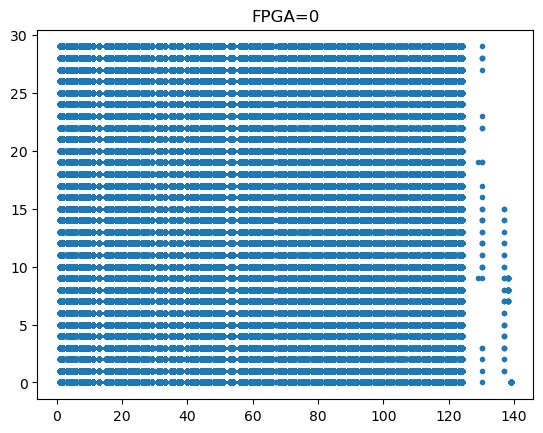

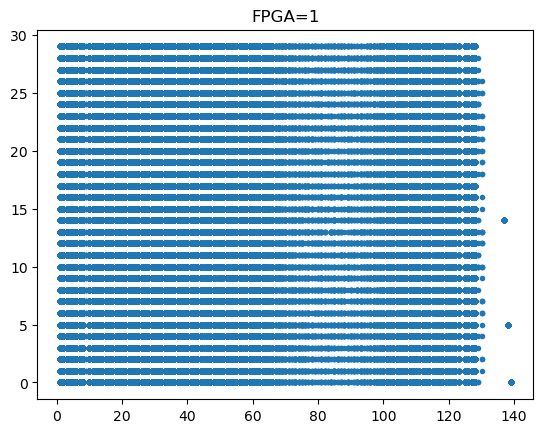

In [36]:
#7:
import matplotlib.pyplot as plt
zero = df[df.FPGA == 0]
one = df[df.FPGA == 1]

f = plt.figure()
plt.plot(zero.TDC_CHANNEL, zero.TDC_MEAS,'.')
plt.title('FPGA=0')
f.show

g = plt.figure()
plt.plot(one.TDC_CHANNEL, one.TDC_MEAS,'.')
plt.title('FPGA=1')
g.show

In [47]:
#8:
gdf = df.groupby(['FPGA']) #Group the data on the basis of FPGA 0 or 1.
df0 = gdf.get_group(0) # only FPGA == 0
df1 = gdf.get_group(1) # only FPGA == 1
# df0.sort_values(by='TDC_MEAS',ascending=False).head(3)
print(df0.sort_values(by='TDC_MEAS',ascending=False).head(3),'\n')
print(df1.sort_values(by='TDC_MEAS',ascending=False).head(3))


        HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
288243     0     0           46  3869203041         363        29   
138340     1     0           61  3869201543        2808        29   
289902     0     0           60  3869203058        1275        29   

          Time in ns  
288243   9099.166669  
138340  70224.166685  
289902  31899.166675   

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
243708      0     1            3  3869202592        1501        29   
525358      1     1           52  3869205483         174        29   
1025107     0     1            4  3869209197        2951        29   

           Time in ns  
243708   37549.166676  
525358    4374.166668  
1025107  73799.166686  


In [53]:
# 9:
dfu = df.groupby('TDC_CHANNEL')
df139 = dfu.get_group(139)
df139
df139['ORBIT_CNT'].value_counts(ascending=True)


ORBIT_CNT
3869204060     1
3869204762     1
3869204217     1
3869206396     1
3869205573     1
              ..
3869206506    25
3869207714    25
3869207812    25
3869208086    26
3869209765    26
Name: count, Length: 10976, dtype: int64

**Topic 7 - Visualization**

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


" gaussians = [norm.pdf(x, loc=val, scale=std_default) for val in x]\n\nax2.plot(x, gaussians, color='r.', label='Gaussian',)\n\nkde = np.sum(gaussians, axis=0)\nkde /= trapz(kde, x)\nax2.plot(x, kde, label='Kernel Density Estimate', color='black')\nax2.set_xlabel('Value')\nax2.set_ylabel('Density')\nax2.legend()\nplt.tight_layout()\nplt.show() "

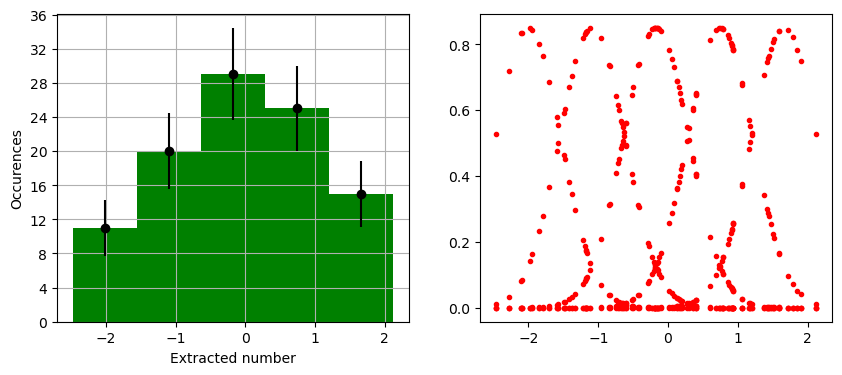

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.stats import norm
from scipy.integrate import trapz

np.random.seed(69)
N = 100
mean = 0
std = 1
x = np.random.normal(mean, std, N)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

bins = 5
counts, edges, patches = ax1.hist(x,bins=bins,color='g',label='Histogram')
bincenters = 0.5*(edges[:-1] + edges[1:])
errors = np.sqrt(counts)
ax1.errorbar(x=bincenters,y=counts,yerr=errors,fmt='o',color='black')
ax1.set_xlabel('Extracted number')
ax1.set_ylabel('Occurences')
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.grid(True)

std_default = 1.06 * x.std() * x.size**(-1/5)
""" gaussians = [N*norm.pdf(x, loc=val, scale=std_default) for val in x]

for i,gaussians in  enumerate(gaussians):
    ax2.plot(x,gaussians,label=f'Gaussian {i+1}') """

gaussians = []
for num in x:
    gaussian = norm.pdf(bincenters,loc=num,scale=std_default)
    gaussians.append(gaussian)
    
ax2.plot(x,gaussians,'r.')
""" gaussians = [norm.pdf(x, loc=val, scale=std_default) for val in x]

ax2.plot(x, gaussians, color='r.', label='Gaussian',)

kde = np.sum(gaussians, axis=0)
kde /= trapz(kde, x)
ax2.plot(x, kde, label='Kernel Density Estimate', color='black')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.legend()
plt.tight_layout()
plt.show() """


    

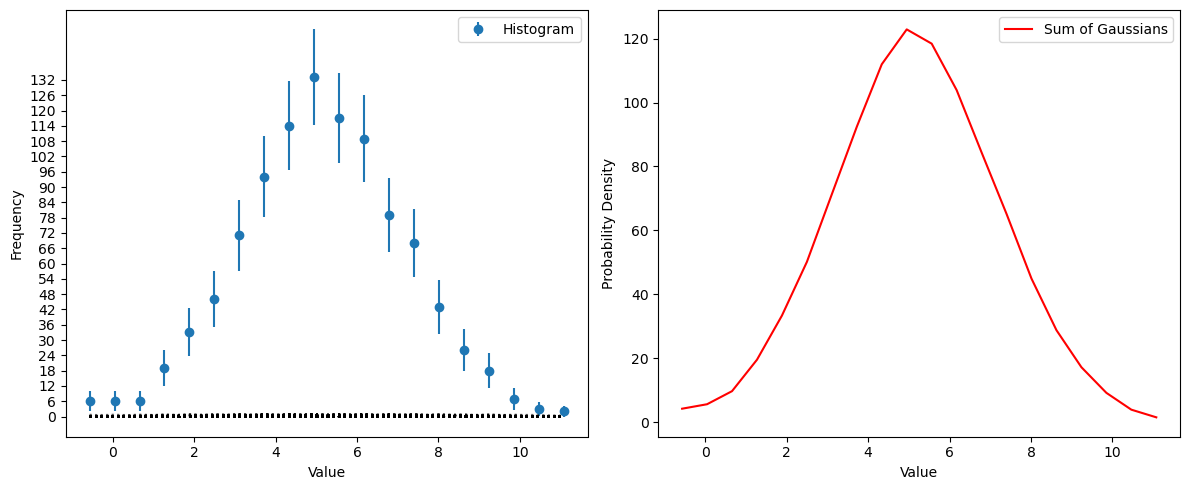

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapz
from scipy.stats import poisson

N = 1000
mean_value = 5
std_dev = 2
x = np.random.normal(mean_value, std_dev, N)

hist, bin_edges = np.histogram(x, bins=20)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_width = bin_edges[1] - bin_edges[0]
hist_err = np.sqrt(hist) / bin_width 

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.errorbar(bin_centers, hist, yerr=hist_err, fmt='o', label='Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.yticks(np.arange(0, max(hist) + 1, 2)[::3])
plt.legend()

std_default = 1.06 * x.std() * N ** (-1 / 5.)

gaussians = []
for value in x:
    std_value = std_default 
    gaussian = norm.pdf(bin_centers, loc=value, scale=std_value)
    gaussians.append(gaussian)
    plt.plot(bin_centers, gaussian, 'k:', alpha=0.1)

sum_gaussians = np.sum(gaussians, axis=0)
integral_hist = trapz(hist, bin_centers)
integral_gaussians = trapz(sum_gaussians, bin_centers)
sum_gaussians /= (integral_gaussians / integral_hist)

plt.subplot(1, 2, 2)
plt.plot(bin_centers, sum_gaussians, label='Sum of Gaussians', color='red')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()

7.2)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2024-01-22 11:10:11--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2024-01-22 11:10:12--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8e02e88756058ce51e7c5ac533.dl.dropboxusercontent.com/cd/0/inline/CL3nExqdD3nURDZQncHS7HopOmmJOj1wmosVe_00tiTFR1qBJtTfJ6BymJ55cL8QXMo9_atMofvHYaPaj-QeTg2AeIJHgrwNpqfc86JYVSIohqSa8wJx_ft5gm3cIW_n1WM/file# [following]
--2024-01-22 11:10:12--  https://uc8e02e88756058ce51e7c5ac533.dl.dropboxusercontent.com/cd/0/inline/CL3nExqdD3nURDZQncHS7HopOmmJOj1wmosVe_00tiTFR1qBJtTfJ6BymJ55cL8

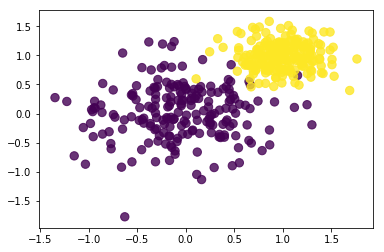

In [70]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

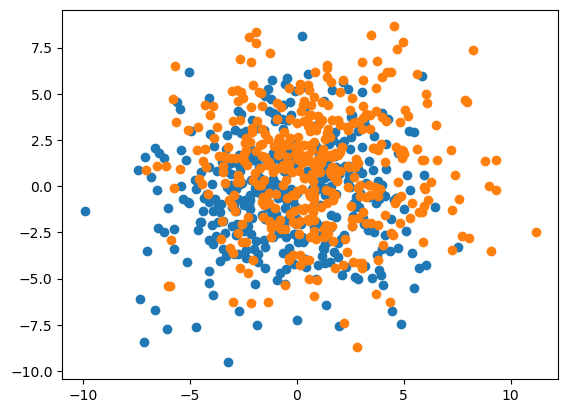

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

n=2
N=400
meanx = -0.5
stdx = 3
meany = 1
stdy = 3
x = np.random.normal(meanx,stdx,size=(N,2))
y = np.random.normal(meany,stdy,size=(N,2))

plt.scatter(x[:,0],x[:,1],marker='o')
plt.scatter(y[:,0],y[:,1],marker='o')

7.3)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [83]:
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2024-01-22 11:29:49--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2024-01-22 11:29:49--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc666b6c3dec916f270bda998fe1.dl.dropboxusercontent.com/cd/0/inline/CL1eZvJyZad_fM1qOJ8atjjObBemmfgPDMmE-gDHqJip9_G-doJtyYs5ZUtFKlUD1OpJPREulypX_xpRtp1c_RzCgjqW9U1b44xsKuq43_tol3IY5iScb5nohCnKFnnYNoo/file# [following]
--2024-01-22 11:29:50--  https://uc666b6c3dec916f270bda998fe1.dl.dropboxusercontent.com/cd/0/inline/CL1eZvJyZad_fM1qOJ8atjjObBemmfgPDMmE-gDHqJip9_G-doJtyYs5ZUtFKlUD1OpJPREulypX_xpRtp1c_RzCgjqW9U1b44xsKuq43

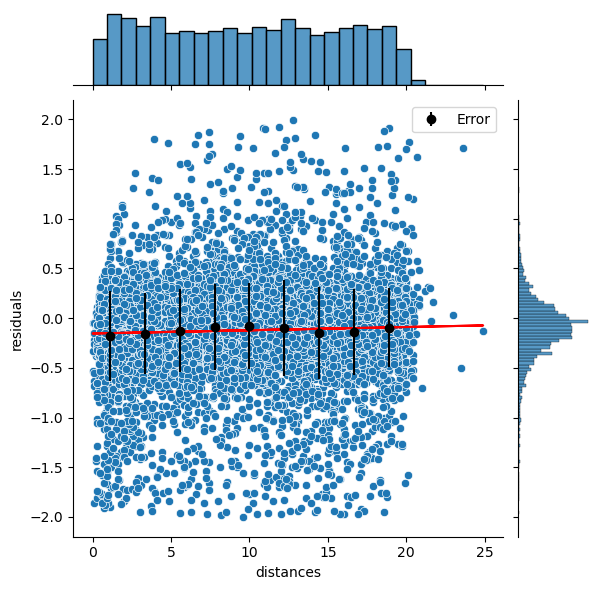

In [111]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy as sc
from scipy.stats import linregress

data_tmp = np.load(file='./residuals_261.npy',allow_pickle=True)
data = pd.DataFrame(data_tmp.item())
data = data[np.abs(data['residuals'])<2]
linreg = linregress(x=data['distances'],y=data['residuals'])
sreg = sns.jointplot(x='distances',y='residuals',data=data,kind='scatter')
sreg.ax_joint.plot(data['distances'],linreg.intercept + linreg.slope*data['distances'],color='red')

bins = np.linspace(0,20,10)
x = (bins[:-1]+bins[1:])/2

y,_,_ = sc.stats.binned_statistic(x=data['distances'],values=data['residuals'],statistic='mean',bins=bins)
erry,_,_ = sc.stats.binned_statistic(x=data['distances'],values=data['residuals'],statistic='std',bins=bins)
plt.errorbar(x,y,yerr=erry,fmt='o',label='Error',color='black')
plt.legend()


**Topic 8 - Linear Algebra**

8.1)

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


[2.69164464e+01 1.28285170e-15 1.93302668e+00] 
 [[-0.11568316 -0.81649658  0.56564188]
 [-0.57708383 -0.40824829 -0.70732424]
 [-0.80845016  0.40824829  0.42395952]]
[2.69306765e+01 1.93310261e+00 1.77056996e-31]
[[ 0.11565963 -0.56564669 -0.81649658]
 [ 0.57711325  0.70730024 -0.40824829]
 [ 0.80843252 -0.42399315  0.40824829]]
False
False
0.9329961184191906
0.9330266972859557
1.0000327749131657
############VALS############
[2.69164464e+01 1.28285170e-15 1.93302668e+00]
############VECS############
[[-0.11568316 -0.81649658  0.56564188]
 [-0.57708383 -0.40824829 -0.70732424]
 [-0.80845016  0.40824829  0.42395952]]
############VALS############
[2.69306765e+01 1.93310261e+00 1.77056996e-31]
############VECS############
[[ 0.11565963 -0.56564669 -0.81649658]
 [ 0.57711325  0.70730024 -0.40824829]
 [ 0.80843252 -0.42399315  0.40824829]]
############PERCETAGE OF VARIABILITY PER COMPONENT############
[9.32996118e+01 4.44670756e-15 6.70038816e+00]


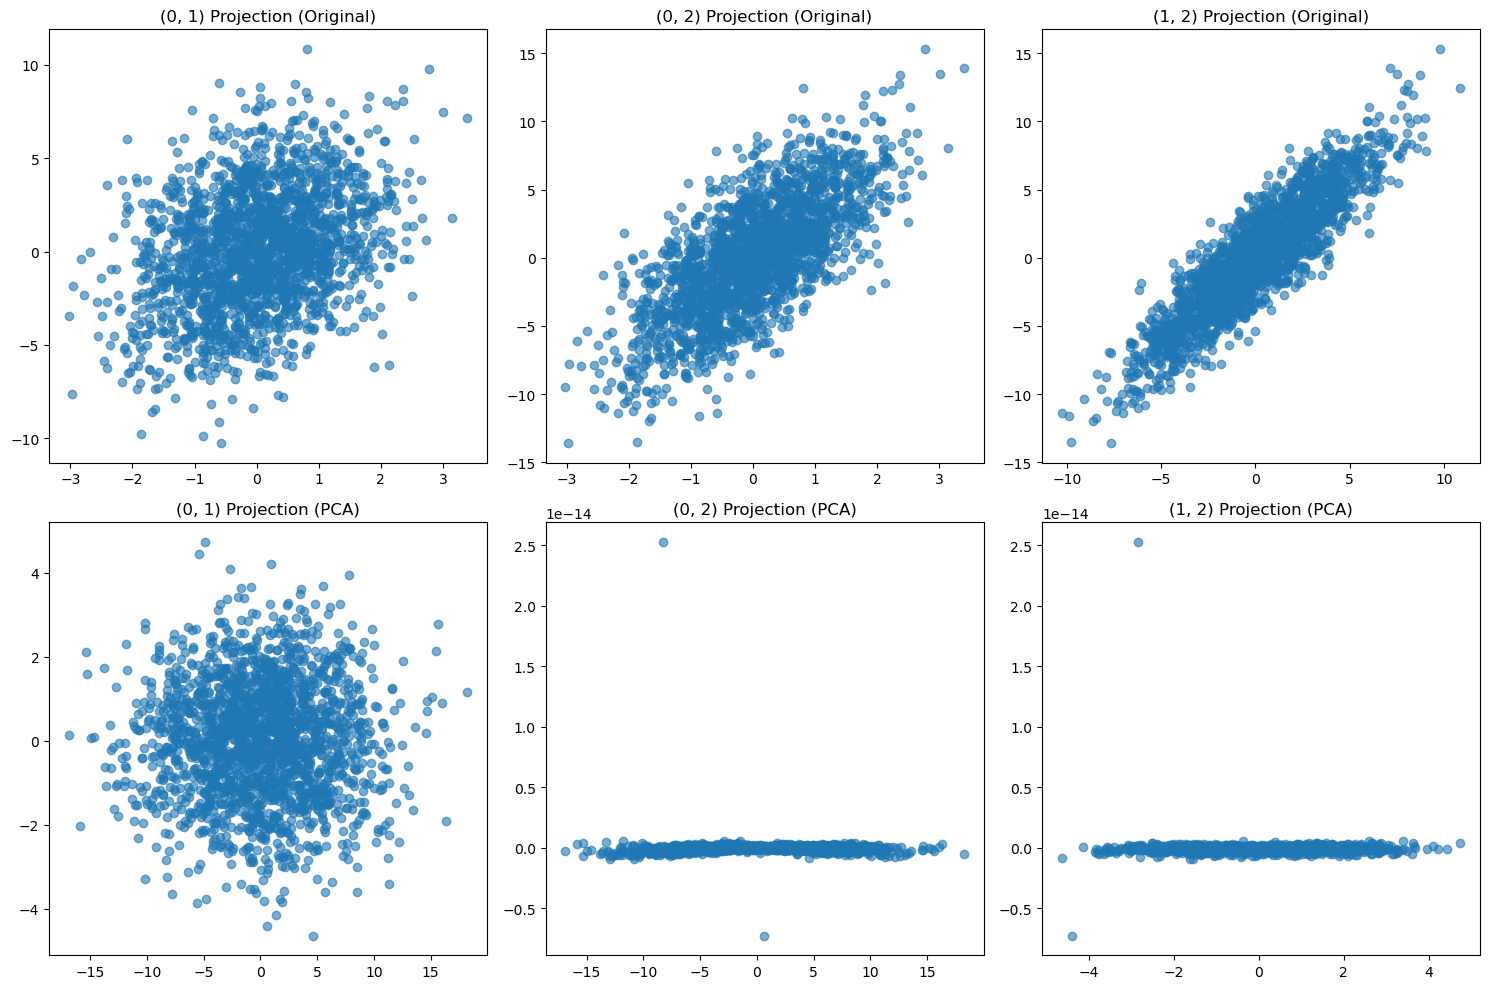

In [129]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

N = 2000
mu,sigma = 0,1
x1 = np.random.normal(mu,sigma,N)
x2 = x1 + np.random.normal(0,3,N)
x3 = 2*x1 + x2

data = np.column_stack((x1,x2,x3))

covmatrix = np.cov(data, rowvar=False) # you have to set rowvar=False so that each column of data is a variable and each row an observation/extraction
eigenvalues, eigenvectors = np.linalg.eig(covmatrix)
print(eigenvalues,'\n',eigenvectors)

U, spectrum, Vt = np.linalg.svd(data,full_matrices=False)
eigenval_svd = spectrum**2/(N-1)
eigenvec_svd = Vt.T
print(eigenval_svd)
print(eigenvec_svd)
print(np.allclose(eigenvalues,eigenval_svd,rtol=eigenvalues/np.sqrt(N)))
print(np.allclose(eigenvectors,eigenvec_svd,rtol=eigenvectors/np.sqrt(N)))

Lambda = np.diag(eigenvalues) ## This is how to get the 
var = Lambda[0,0]/Lambda.trace() ## variability. 
print(var) 

Lambda_svd = np.diag(eigenval_svd)
var_svd = Lambda_svd[0,0]/Lambda_svd.trace()
print(var_svd)

print(var_svd/var)

## Fede fa:
explained_var_ratio = eigenvalues/np.sum(eigenvalues)
cumulative_var_ratio=np.cumsum(explained_var_ratio)
num_components = np.argmax(cumulative_var_ratio >= 0.99) +1

pca = PCA(n_components=num_components)
data_pca = pca.fit_transform(data)

data_pca_back = pca.inverse_transform(data)

# Checking the results
np.allclose(np.abs(eigenvalues), spectrum**2)
print("############VALS############")
print(eigenvalues)
print("############VECS############")
print(eigenvectors)
print("############VALS############")
print(eigenval_svd)
print("############VECS############")
print(eigenvec_svd)

print("############PERCETAGE OF VARIABILITY PER COMPONENT############")
explained_variance_ratio=eigenvalues/np.sum(eigenvalues)*100
print(explained_variance_ratio)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Scatter plots in the original coordinates
axes[0, 0].scatter(x1, x2, alpha=0.6)
axes[0, 0].set_title('(0, 1) Projection (Original)')

axes[0, 1].scatter(x1, x3, alpha=0.6)
axes[0, 1].set_title('(0, 2) Projection (Original)')

axes[0, 2].scatter(x2, x3, alpha=0.6)
axes[0, 2].set_title('(1, 2) Projection (Original)')

# Scatter plots in the new coordinates after PCA
axes[1, 0].scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.6)
axes[1, 0].set_title('(0, 1) Projection (PCA)')

axes[1, 1].scatter(data_pca[:, 0], data_pca[:, 2], alpha=0.6)
axes[1, 1].set_title('(0, 2) Projection (PCA)')

axes[1, 2].scatter(data_pca[:, 1], data_pca[:, 2], alpha=0.6)
axes[1, 2].set_title('(1, 2) Projection (PCA)')

plt.tight_layout()
plt.show()


**Topic 9 - Alghoritmhs**

1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [133]:
import numpy as np
from scipy.interpolate import UnivariateSpline

max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

cprob = np.arange(1,years_nb +1)/(years_nb+1)
sorted_speed = np.sort(max_speeds)
quantile = UnivariateSpline(cprob,sorted_speed,s=0)
fifty_prob = 1. - 0.02
fifty_wind = quantile(fifty_prob)
print(f"The maximum wind speed occurring every 50 years is estimated to be: {fifty_wind} m/s")

The maximum wind speed occurring every 50 years is estimated to be: 36.96971413811491 m/s


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

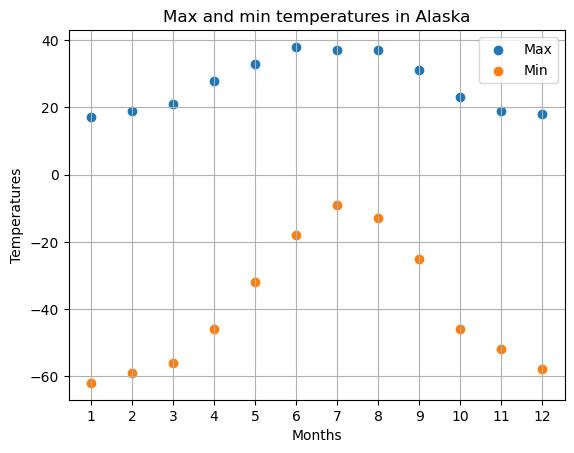

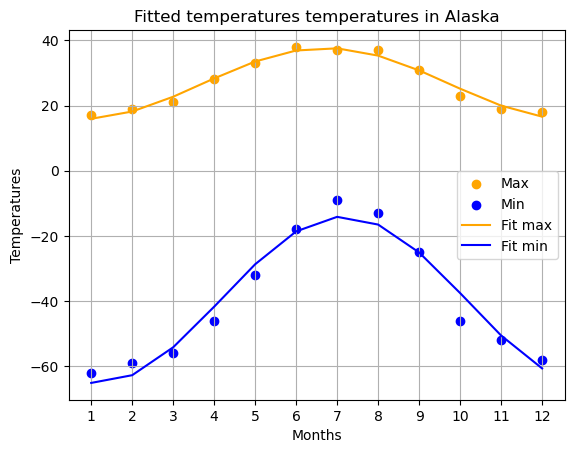

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

mins = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
maxs = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
months = np.arange(1,int(np.shape(mins)[0]+1))

plt.scatter(months,maxs,label='Max')
plt.scatter(months,mins,label='Min')
plt.xlabel('Months')
plt.xticks(months)
plt.ylabel('Temperatures')
plt.title('Max and min temperatures in Alaska')
plt.legend()
plt.grid()
plt.show()

def temp_function(month, ampl, offset, phase):
    return ampl * np.sin((month + phase) * 2 * np.pi / 12) + offset
    
pmin, covmin = curve_fit(temp_function, months,mins,p0=[-40, 0, 0])
pmax, covmax = curve_fit(temp_function,months,maxs,p0=[20, 0, 0])

fit_min = temp_function(months,*pmin)
fit_max = temp_function(months,*pmax)

plt.scatter(months,maxs,label='Max',color='orange')
plt.scatter(months,mins,label='Min',color='blue')
plt.plot(months,fit_max,label='Fit max',color='orange')
plt.plot(months,fit_min,label='Fit min',color='blue')
plt.xlabel('Months')
plt.xticks(months)
plt.ylabel('Temperatures')
plt.title('Fitted temperatures temperatures in Alaska')
plt.legend()
plt.grid()
plt.show()

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


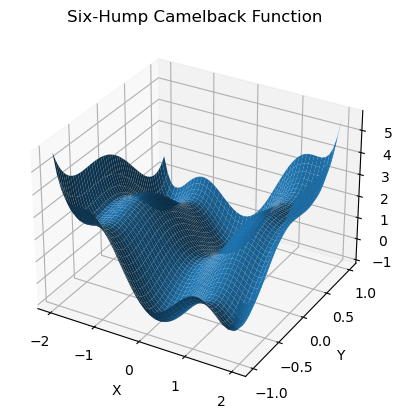

Minimum value of the function: 0.0
Optimal parameters (x, y): [0. 0.]


In [169]:
from scipy.optimize import minimize
import pylab as pl

def camelback(x):
    return ((4-2.1*x[0]**2 + (x[0]**4)/3)*x[0]**2+x[0]*x[1]+(4*x[1]**2 - 4)*x[1]**2 )

# Values:
x_vals = np.linspace(-2,2)
y_vals = np.linspace(-1,1)
X,Y = np.meshgrid(x_vals,y_vals)
Z = camelback([X,Y])

# PLotting:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X,Y)')
ax.set_title('Six-Hump Camelback Function')
plt.show()

bounds = [(-2,2),(-1,1)]
result = minimize(camelback,x0=[0,0],bounds=bounds,method='L-BFGS-B')

print("Minimum value of the function:", result.fun)
print("Optimal parameters (x, y):", result.x)



5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

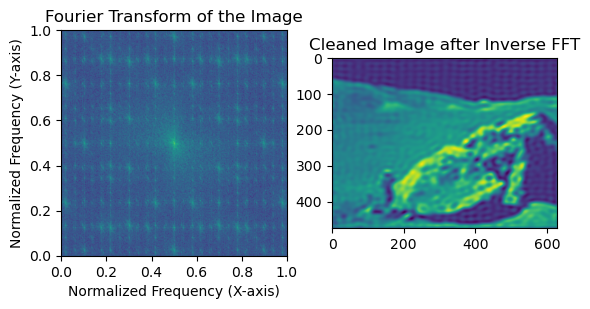

In [176]:
import pylab as pl
from scipy.fftpack import fft2, ifft2, fftshift
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = pl.imread(fname='./moonlanding.png')

# Compute 2-D FFT and shift the zero-frequency component to the center
fft_img = fft2(image)
shift_img = fftshift(fft_img)

# Plot the spectrum of the image
plt.figure()
plt.subplot(121)
plt.imshow(np.log(np.abs(shift_img) + 1), extent=(0, 1, 0, 1))
plt.title('Fourier Transform of the Image')
plt.xlabel('Normalized Frequency (X-axis)')
plt.ylabel('Normalized Frequency (Y-axis)')

# Create a circular mask to filter out high-frequency components
rows, cols = image.shape
r, c = rows // 2, cols // 2  # center coordinates
radius = 30  # radius of the circular mask
mask = np.ones((rows, cols), dtype=bool)
y, x = np.ogrid[-r:rows-r, -c:cols-c]
mask_area = x**2 + y**2 <= radius**2
mask[mask_area] = False

# Apply the circular mask to the shifted FFT image
shift_img_filtered = shift_img.copy()
shift_img_filtered[mask] = 0

# Apply the inverse Fourier transform to get the cleaned image
image_cleaned = np.abs(ifft2(fftshift(shift_img_filtered)))

# Plot the cleaned image
plt.subplot(122)
plt.imshow(image_cleaned)
plt.title('Cleaned Image after Inverse FFT')
plt.show()


**Topic 10 - Montecarlo**